In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import plt
from pandas import DataFrame

%matplotlib inline

In [2]:
dtf=pd.read_csv('C:\DJ\Datathon\HAC\HAC_opV8.csv')

In [3]:
dtf.head()

,﻿EventID,eventdate,hosp_inf,PersonID,category,LocationName,Age__int,event_month,specialty,depression,...,summer,fall,zip,sex_male,sex_female,race,ethnicity,language,payer,bmi
0,23466485,2014-07-28,1,342237,Manifestations of Poor Glycemic Control,14th Ave Medical Center,16,7,Family practice,0,...,1,0,99344.0,1,0,Needs Update,Hispanic,English,other,41.736442
1,23545856,2012-11-21,1,623799,Manifestations of Poor Glycemic Control,14th Ave Medical Center,49,11,Radiologist,1,...,0,1,99203.0,1,0,Needs Update,Not Hispanic or Latino,Other,other,41.736442
2,109861,2016-05-05,0,12823,NaN,14th Ave Medical Center,52,5,Radiologist,0,...,0,0,99207.0,1,0,Needs Update,Not Hispanic or Latino,Other,other,41.736442
3,222950,2012-08-16,0,26817,NaN,14th Ave Medical Center,8,8,Radiologist,0,...,1,0,99109.0,0,1,Needs Update,Not Hispanic or Latino,Other,other,23.000000
4,10782582,2013-07-12,0,437467,NaN,14th Ave Medical Center,45,7,Radiology Diagnostic,0,...,1,0,99357.0,1,0,Needs Update,Other or Undetermined,English,other,44.900000


In [4]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196 entries, 0 to 12195
Data columns (total 27 columns):
﻿EventID        12196 non-null int64
eventdate       12196 non-null object
hosp_inf        12196 non-null int64
PersonID        12196 non-null int64
category        2196 non-null object
LocationName    12196 non-null object
Age__int        12196 non-null int64
event_month     12196 non-null int64
specialty       12196 non-null object
depression      12196 non-null int64
anxiety         12196 non-null int64
stroke          12196 non-null int64
pain            12196 non-null int64
diabetes        12196 non-null int64
preg_in_year    12196 non-null int64
winter          12196 non-null int64
spring          12196 non-null int64
summer          12196 non-null int64
fall            12196 non-null int64
zip             12195 non-null float64
sex_male        12196 non-null int64
sex_female      12196 non-null int64
race            12196 non-null object
ethnicity       12196 non-null obj

In [5]:




dtf = pd.concat([dtf, pd.get_dummies(dtf['LocationName'], prefix='Location')], axis=1)
dtf = pd.concat([dtf, pd.get_dummies(dtf['specialty'], prefix='specialty')], axis=1)

dtf = pd.concat([dtf, pd.get_dummies(dtf['race'], prefix='race')], axis=1)
dtf = pd.concat([dtf, pd.get_dummies(dtf['ethnicity'], prefix='ethnicity')], axis=1)
dtf = pd.concat([dtf, pd.get_dummies(dtf['language'], prefix='payer')], axis=1)




dtf2=dtf#.drop('EventID',1)
dtf2=dtf2.drop('PersonID',1)
dtf2=dtf2.drop('category',1)
dtf2=dtf2.drop('LocationName',1)
dtf2=dtf2.drop('specialty',1)
#dtf2=dtf2.drop('race',1)
dtf2=dtf2.drop('ethnicity',1)
dtf2=dtf2.drop('language',1)

In [6]:
dtf2.head()

,﻿EventID,eventdate,hosp_inf,Age__int,event_month,depression,anxiety,stroke,pain,diabetes,...,ethnicity_Not Hispanic or Latino,ethnicity_Other or Undetermined,ethnicity_other,payer_English,payer_Other,payer_Russian,payer_Somali,payer_Spanish,payer_Vietnamese,payer_other
0,23466485,2014-07-28,1,16,7,0,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23545856,2012-11-21,1,49,11,1,1,0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,109861,2016-05-05,0,52,5,0,0,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,222950,2012-08-16,0,8,8,0,1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10782582,2013-07-12,0,45,7,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#creating new fields 

dtf2['bmi_underweight'] = dtf2.bmi.map(lambda x: 1 if ( x < 18.5) else 0)
dtf2['bmi_overweight'] = dtf2.bmi.map(lambda x: 1 if ( x >25) else 0)

In [8]:
#correlation analysis

corr_series = dtf.corr()['hosp_inf'].sort_values(ascending=False)

print(corr_series)

hosp_inf                                   1.000000
diabetes                                   0.512573
﻿EventID                                   0.499933
specialty_Emergency Medicine               0.277191
specialty_Hospital                         0.150704
depression                                 0.147805
anxiety                                    0.094831
specialty_Internal Medicine                0.085089
ethnicity_Not Hispanic or Latino           0.080973
Age__int                                   0.072226
sex_male                                   0.063961
specialty_Critical Care                    0.060264
race_White                                 0.054304
payer_English                              0.044027
Location_Yakima Neighborhood Health Ser    0.039511
Location_CHAS Downtown Clinic              0.032805
Location_Peninsula Comm Hlth Svc Bremer    0.031573
Location_Sea Mar Comm Hlth Ctr Lacey       0.028449
Location_Community Health Care Lakewood    0.027934
Location_Val

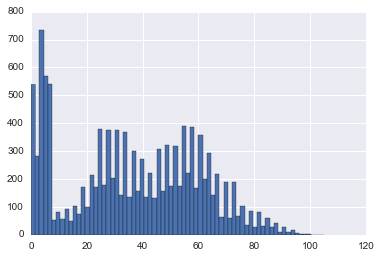

In [9]:
dtf2['Age__int'].hist(bins=70)

#age distribution of dataset

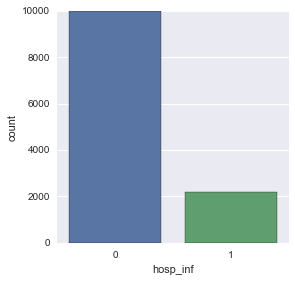

In [10]:
sns.factorplot('hosp_inf',kind='count',data=dtf)

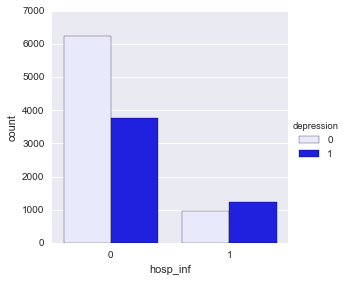

In [11]:
sns.factorplot('hosp_inf',kind='count',data=dtf,hue='depression',color='blue')

#of all the HAC incidents people who had depression are more

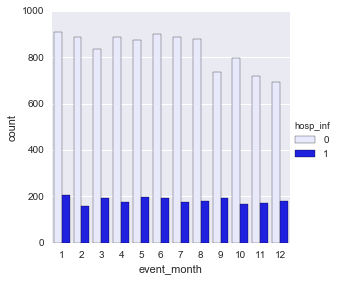

In [12]:
sns.factorplot('event_month',kind='count',data=dtf,hue='hosp_inf',color='blue')

In [13]:
corr_series = dtf2.corr()['hosp_inf'].order(ascending=False)

selected_columns = corr_series.index

selected_columns = selected_columns[((selected_columns != 'hosp_inf' ) &  (selected_columns != 'EventID'))]

print(selected_columns)

Index([u'diabetes', u'﻿EventID', u'specialty_Emergency Medicine',
       u'specialty_Hospital', u'depression', u'anxiety',
       u'specialty_Internal Medicine', u'ethnicity_Not Hispanic or Latino',
       u'Age__int', u'sex_male',
       ...
       u'specialty_PATHOLOGY', u'race_Needs Update', u'sex_female',
       u'preg_in_year', u'bmi_overweight', u'ethnicity_Other or Undetermined',
       u'specialty_Anesthesiology', u'specialty_Obstetrics Gynecology',
       u'specialty_pediatrics', u'specialty_Radiology Diagnostic'],
      dtype='object', length=155)


C:\Users\dinesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [14]:
dtf3=dtf2.dropna()

X = dtf3.ix[:, selected_columns] 

y = dtf3.ix[:, dtf3.columns == 'hosp_inf']



In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import RandomForestClassifier
lr=KNeighborsClassifier()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


C:\Users\dinesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.89177370866356931

In [17]:
from sklearn.ensemble import RandomForestClassifier
lr=RandomForestClassifier()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


C:\Users\dinesh\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.94698004919376877